John Gadomski - Final Project Part 1 

What is the "name" of the dataset?

The name of the dataset is "NFL Big Data", which is a dataset that is used and updated annually for the NFL Big Data Bowl held on Kaggle each year. Every year, The National Football League hosts a competition on Kaggle in which they ask data scientists to answer their biggest questions. Football is a very dynamic sport, the strategies of the sport are constantly changing due to big data and analytics. Data scientists are able to determine which type of plays are most effective in every type of scenario in the game. This dataset uses data collected by Next Gen Stats, which includes player tracking data, so you have the capability of mapping out the football field, and testing tendencies when players run with the ball. 

Where did you obtain it?

The data is public on Kaggle, and published for the 2020 NFL Big Data Bowl. 

Where can we obtain it? (i.e., URL)

https://www.kaggle.com/competitions/nfl-big-data-bowl-2020/data 

What is the license of the dataset? What are we allowed to do with it?  This information is generally found in an "About" page or in documentation.  If there is no explicit license, use what you find in the dataset documentation to make your "best guess".

In the "Rules" section of the kaggle page, the licensing rules are as follows: 
Competition Use, Non-Commercial, and Academic Use Only
In my case I am authorized to use the data for academic use.

How big is it in file size and in items?  Looking ahead, how does this relate to GitHub's limits on uploading large files?  If you plan on hosting the data yourself and it is larger than GitHub's limits, state your plan for how you will address this issue.  (Note: your plan might change a little bit from what you propose here and that is ok!)

The file size is approximately 250MB, which means I will have to breakdown the data into smaller files when uploading to Github. Will make separate visualizations as I know the tracking data may take up a lot of space.

The data includes directional data, weather data, player data, scoring data, and even more. With all this data, I will be able to visualize player movements on the field, and answer questions such as, what is the optimal direction to run when in the shotgun vs under center? Does temperature impact the ability to run or throw the ball more?

In [2]:
import pandas as pd

In [6]:
#Dataset
df = pd.read_csv('NFLBigData.csv')
df.head()

/Users/john/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW


In [7]:
import matplotlib.pyplot as plt

Make a simple plot showing a relationship of interest. You can use matplotlib or pandas (or other). Don't worry about colors, labels or anything else of that nature!  Include a few sentences about what your plot is aiming to show and why it is interesting.

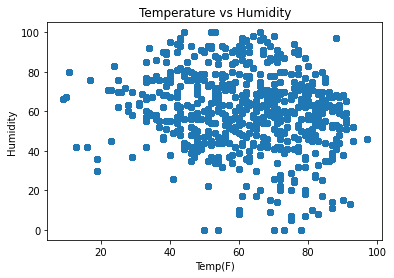

In [8]:
plt.scatter(df['Temperature'], df['Humidity'])
plt.title("Temperature vs Humidity")
plt.xlabel("Temp(F)")
plt.ylabel("Humidity")
plt.show()

Decided to quickly visualize some temperature and humidity data, as I may expand on both of these variables and try to answer questions such as, "Does temperature or humidity impact ball movement more?". There is little correlation between temperature and humidity, specifically where these NFL teams play.

FINAL PROJECT PART 2

In [10]:
import ipywidgets as widgets
from IPython.display import display

Dropdown(description='Variable:', options=('PlayerHeight and PlayerWeight', 'Position', 'Temperature and Humid…

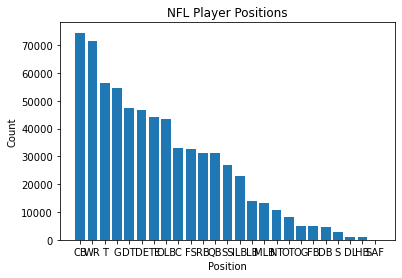

In [11]:
def create_plot(variable):
    if variable == 'PlayerHeight and PlayerWeight':
        plt.scatter(df['PlayerHeight'], df['PlayerWeight'])
        plt.xlabel('Height (ft-in)')
        plt.ylabel('Weight (lbs)')
        plt.title('NFL Player Height vs Weight')
        plt.show()
    elif variable == 'Position':
        position_counts = df['Position'].value_counts()
        plt.bar(position_counts.index, position_counts.values)
        plt.xlabel('Position')
        plt.ylabel('Count')
        plt.title('NFL Player Positions')
        plt.show()
    elif variable == 'Temperature and Humidity':
        plt.scatter(df['Temperature'], df['Humidity'])
        plt.xlabel('Temperature (deg F)')
        plt.ylabel('Humidity')
        plt.title('NFL Game Temperature vs Humidity')
        plt.show()
    elif variable == 'GameWeather':
        weather_counts = df['GameWeather'].value_counts()
        plt.pie(weather_counts.values, labels=weather_counts.index)
        plt.title('NFL Game Weather Conditions')
        plt.show()

variable_dropdown = widgets.Dropdown(options=['PlayerHeight and PlayerWeight', 'Position', 'Temperature and Humidity', 'GameWeather'], description='Variable:')

def on_variable_change(change):
    create_plot(change.new)

variable_dropdown.observe(on_variable_change, names='value')
display(variable_dropdown)

In [13]:
player_dropdown = widgets.Dropdown(options=df['DisplayName'].unique(), description='Player:')

def display_player_info(player):
    height, weight = df[df['DisplayName'] == player][['PlayerHeight', 'PlayerWeight']].iloc[0]
    print(f'{player}\'s height is {height} and weight is {weight} lbs')

def on_player_change(change):
    display_player_info(change.new)
player_dropdown.observe(on_player_change, names='value')
display(player_dropdown)

#This gave me a error free result but requires you to browse the names by hand instead of typing it in

Dropdown(description='Player:', options=('Eric Berry', 'Allen Bailey', 'Justin Houston', 'Derrick Johnson', 'R…

Phillip Gaines's height is 6-0 and weight is 193 lbs
Daniel Sorensen's height is 6-2 and weight is 208 lbs


The dashboard allows you to explore NFL player statistics, game conditions, player position count, and temperature/humidity statistics. The first interactive dashboard displays a pie chart of game weather conditions. The bottom section allows users to search for a player's height and weight using either a dropdown list of player names or by typing in a name directly. Users can gain insights into the physical characteristics of NFL players, as well as the weather conditions that games are played in. This dashboard would be useful for anyone interested in studying NFL players or for fans who want to gain a deeper understanding of the game.
The data was already cleaned and ready to use, so didn't have to do any precprocessing of the data before I visualized. I created two different widgets using the ipywidgets library. The first widget was a pie chart that showed the frequency of game weather conditions. This widget was connected to a dropdown menu that allowed the user to select a minimum frequency for display.The second widget was a dropdown menu that allowed users to select a player's name to search for their height and weight. I connected this widget to a function that would search the dataframe for the player's name and then display their height and weight in a textbox. I then created a layout using the ipywidgets library that arranged the two widgets and the textbox in a user-friendly manner. I ran into some issues with displaying player information using the input text box, so will have to tinker with both visualizations.

An additional dataset I may use comes from https://www.kaggle.com/datasets/kendallgillies/nflstatistics, which is a huge dataset which contains player specific information. The data includes hometown, height, weight, college, high school, and some other variables that can give me better insight into active versus retired players. This will also allow me to analyze college performance and positional performance based on college (As some colleges are touted as more dominant in certain positions).